In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
scored_data = pd.read_csv('scored_data.csv')

## Dummy variables

In [57]:
dummies_category = pd.get_dummies(scored_data['Category'])
dummies_badges = scored_data['Badges'].str.strip('{}').str.replace('"', '').str.get_dummies(',')

In [58]:
dropped_cols = scored_data.drop(['Unnamed: 0','Category','Badges'], axis = 1)

In [59]:
complete_data = pd.concat([dropped_cols,dummies_category, dummies_badges], axis = 1)
complete_data['Start At'] = pd.to_datetime(complete_data['Start At'])
complete_data['Order Date'] = pd.to_datetime(complete_data['Order Date'])
complete_data = complete_data.set_index('User Key')

In [60]:
complete_data.to_csv('scored_data_wth_dummies.csv')

## Missing values

In [38]:
complete_data = complete_data.dropna(axis=0)

<Axes: >

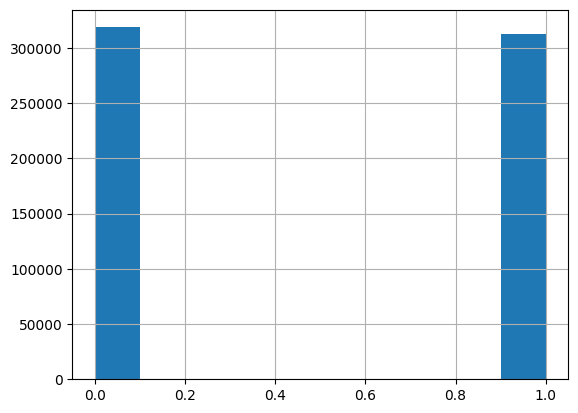

In [39]:
complete_data['interaction'].hist()

## Distribution

In [40]:
target = 'interaction'

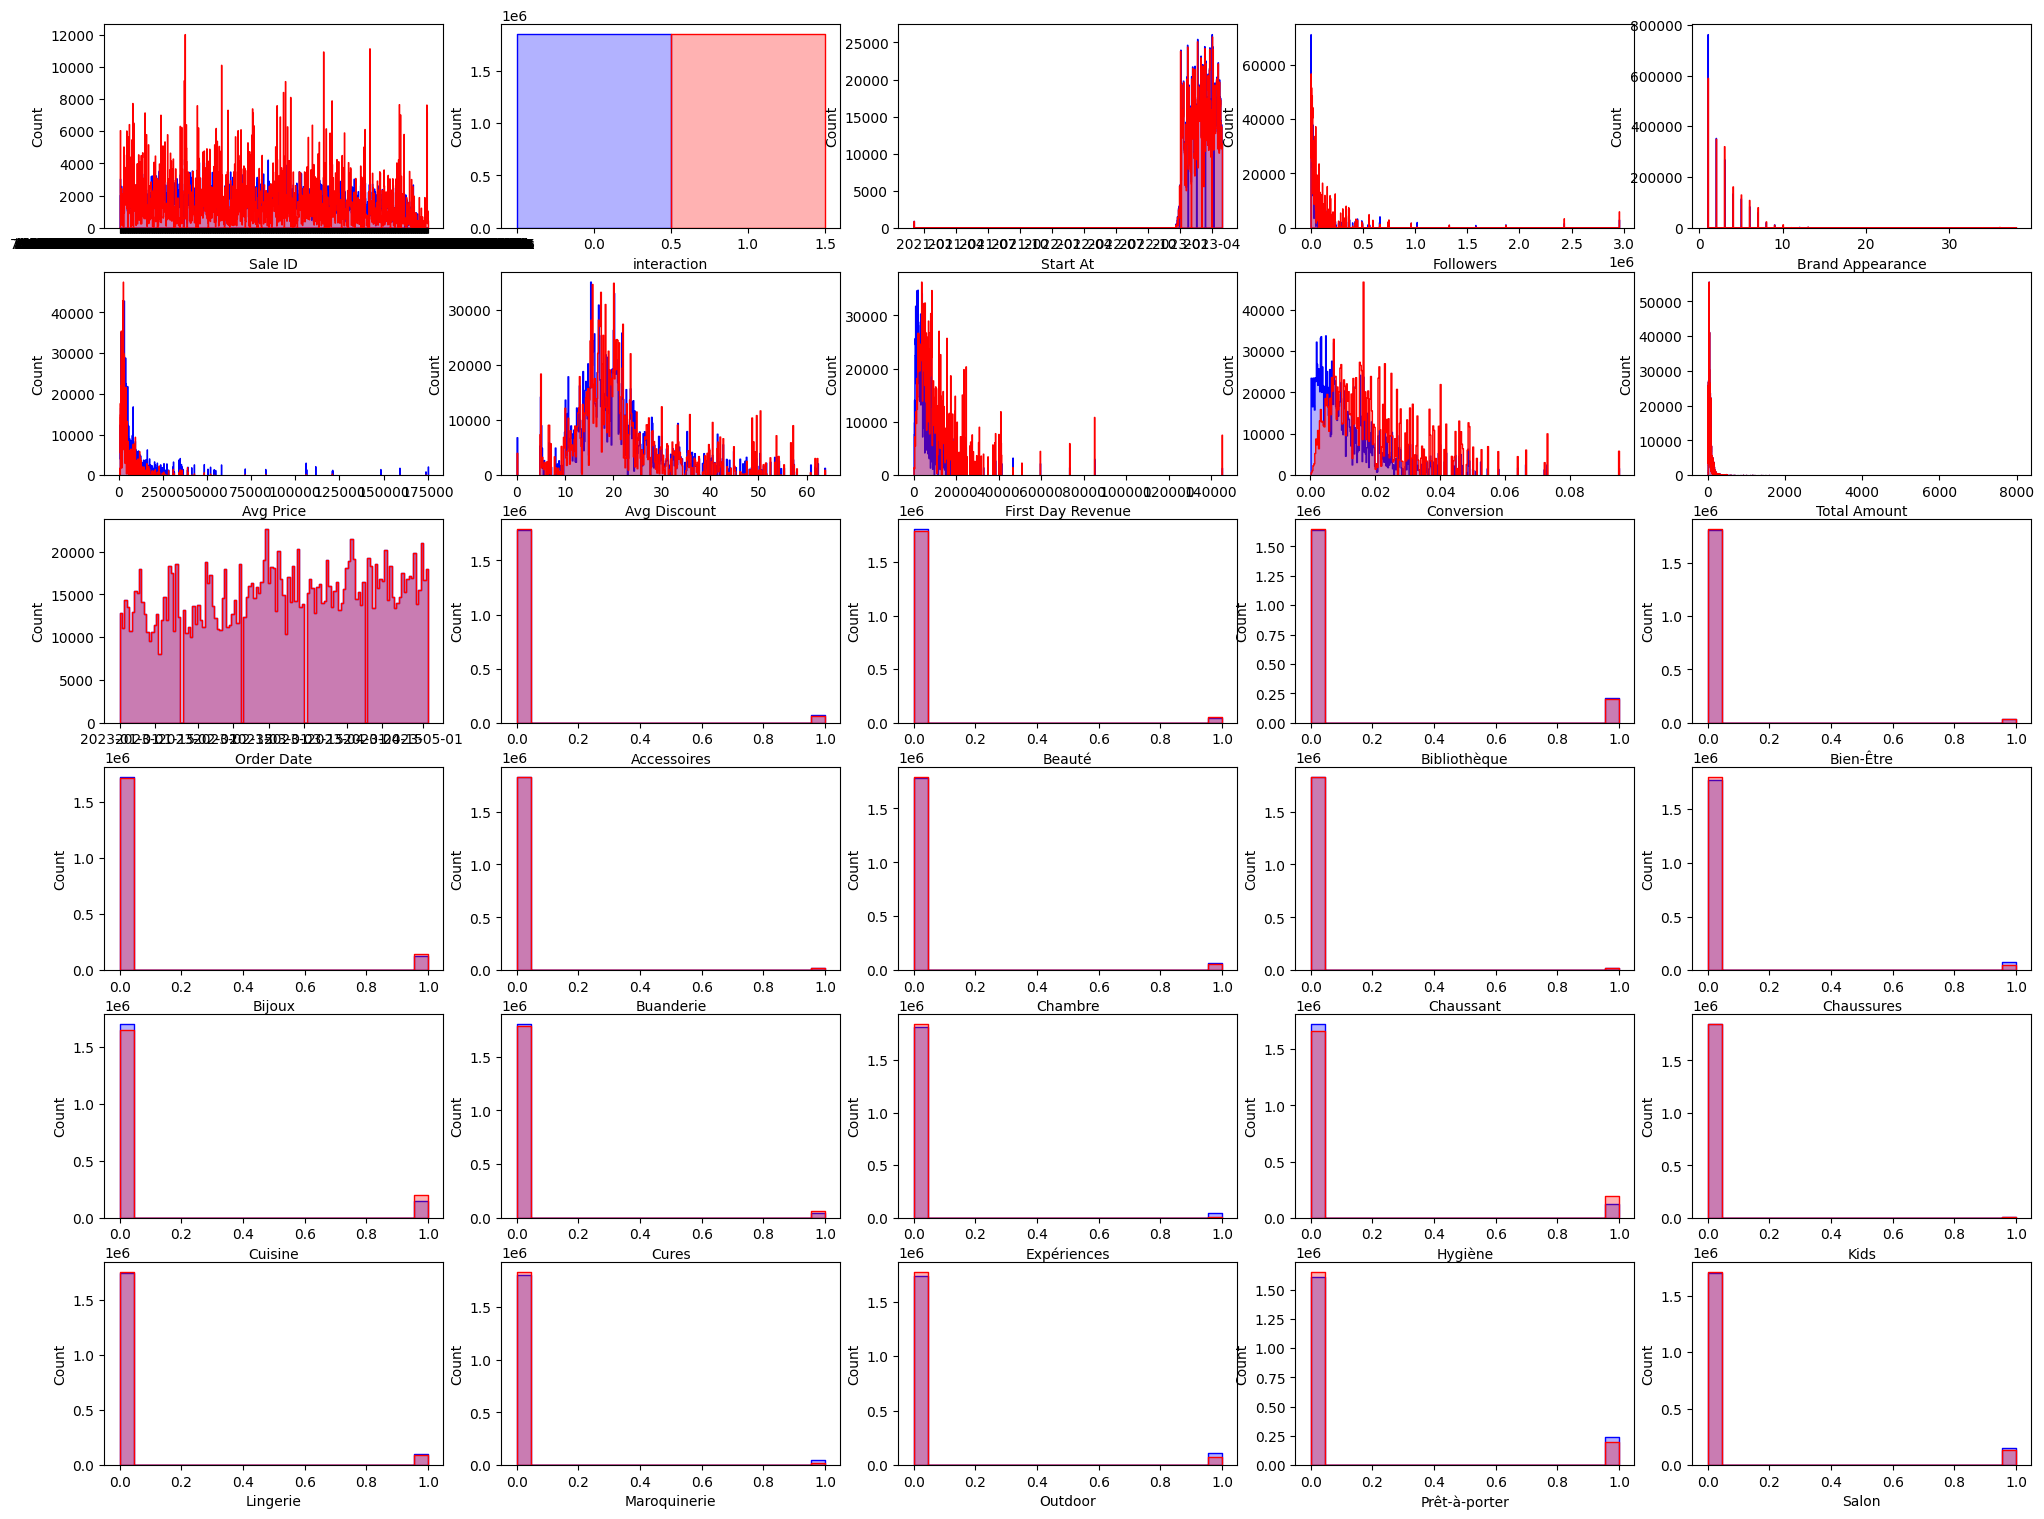

In [61]:
X= complete_data

X0 = X[X[target]==0]
X1 = X[X[target]==1]

fig, axes = plt.subplots(ncols=5, nrows=6, figsize=(20,15))
fig.tight_layout()

for i, ax in zip(range(X.columns.size), axes.flat):
    sns.histplot(X0.iloc[:,i], color="blue", element="step", ax=ax,  alpha=0.3) #alpha is transparency!
    sns.histplot(X1.iloc[:,i], color="red", element="step", ax=ax,  alpha=0.3)
plt.show()